# データの取得

## APIからデータを取得

pandasの利用例として、ヒストリカルデータを扱います。FTXのAPIから4本値を取得します。

In [1]:
import json
from urllib import request

import pandas as pd
import plotly.graph_objects as go

```python
url = "https://ftx.com/api/markets/BTC-PERP/candles?resolution=300&start_time=1643641200&1643727600"

with request.urlopen(url) as res:
    json_data = json.loads(res.read().decode())
```

```{attention}
実際には上記のコードで取得しますが、ここでは取得済みのJSONファイルから読み込みます。
```

In [2]:
with open("ftx_btc-rerp_20220306-20220312.json", "r") as f:
    json_data = json.load(f)

## DataFrameの作成

`DataFrame` クラスに辞書やリストを渡すと、DataFrameを生成します。

In [3]:
df = pd.DataFrame(json_data["result"])
df.head()

startTime          time     open     high      low  \
0  2022-03-09T20:00:00+00:00  1.646856e+12  42229.0  42271.0  42228.0   
1  2022-03-09T20:05:00+00:00  1.646856e+12  42254.0  42357.0  42246.0   
2  2022-03-09T20:10:00+00:00  1.646857e+12  42253.0  42318.0  42123.0   
3  2022-03-09T20:15:00+00:00  1.646857e+12  42147.0  42183.0  42080.0   
4  2022-03-09T20:20:00+00:00  1.646857e+12  42089.0  42190.0  42089.0   

     close        volume  
0  42254.0  4.986935e+06  
1  42253.0  1.541197e+07  
2  42146.0  1.741020e+07  
3  42089.0  8.337687e+06  
4  42110.0  5.248858e+06

## データ型

`dtypes` 属性はDataFrameの各列のデータ型が格納されています。

In [4]:
df.dtypes

startTime     object
time         float64
open         float64
high         float64
low          float64
close        float64
volume       float64
dtype: object

`to_datetime` 関数はさまざまなオブジェクトをdatetime型に変換します。次のコードでは「startTime」列と「time」列をdatetime型に変換しています。

In [5]:
df.loc[:, "startTime"] = pd.to_datetime(df.loc[:, "startTime"])
df.loc[:, "time"] = pd.to_datetime(df.loc[:, "time"], unit="ms")

In [6]:
df.head()

startTime                time     open     high      low  \
0 2022-03-09 20:00:00+00:00 2022-03-09 20:00:00  42229.0  42271.0  42228.0   
1 2022-03-09 20:05:00+00:00 2022-03-09 20:05:00  42254.0  42357.0  42246.0   
2 2022-03-09 20:10:00+00:00 2022-03-09 20:10:00  42253.0  42318.0  42123.0   
3 2022-03-09 20:15:00+00:00 2022-03-09 20:15:00  42147.0  42183.0  42080.0   
4 2022-03-09 20:20:00+00:00 2022-03-09 20:20:00  42089.0  42190.0  42089.0   

     close        volume  
0  42254.0  4.986935e+06  
1  42253.0  1.541197e+07  
2  42146.0  1.741020e+07  
3  42089.0  8.337687e+06  
4  42110.0  5.248858e+06

## Plotlyによる可視化

Plotlyはインタラクティブな可視化を簡素な記述で実装できるPythonパッケージです。pandasのDataFrameと相性がよく、次のコードのようにローソク足をかんたんに作成できます。

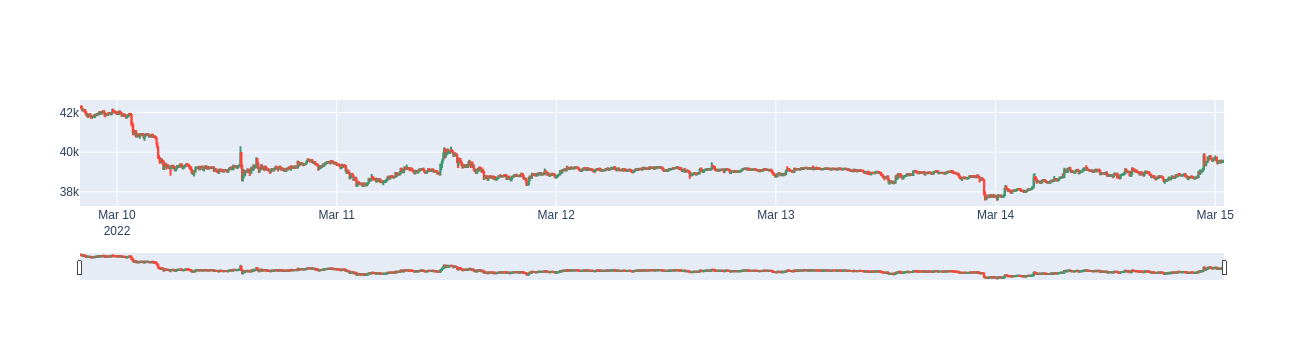

In [7]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=df["startTime"],
            open=df["open"],
            high=df["high"],
            low=df["low"],
            close=df["close"],
        )
    ]
)
fig.show()

あとで利用するために、pickle形式でデータを保存（直列化）します。

In [8]:
df.to_pickle("ftx_btc-rerp_20220306-20220312.pickle", protocol=4)